# Taller 2 TIA
## Jose Eduardo Garnica Aza - Johan Sebastian Suarez Sepulveda

## Filtro Prewitt
- Prewitt es un filtro de uso común para detectar el borde de una imagen, consta de 8 matrices que se aplican píxel a píxel a la imagen. Luego se suman las imágenes.

In [2]:
%matplotlib inline
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np 
import math as m
import time
import timeit as tm
import cv2
import pandas as pd

In [3]:
image=np.array(Image.open('Tarjeton.jpg'))
height, width = image.shape[:2]
image=cv2.resize(image, (2*width,2*height), cv2.INTER_LINEAR)


### Definición de función Prewitt Total

In [4]:

def PrewittTotal(image): 
    kernelN=np.array([[-1,-1,-1],[1,-2,1],[1,1,1]])
    kernelS=np.array([[1,1,1],[1,-2,1],[-1,-1,-1]])
    kernelE=np.array([[1,1,-1],[1,-2,-1],[1,1,-1]])
    kernelO=np.array([[-1,1,1],[-1,-2,1],[-1,1,1]])
    kernelNO=np.array([[-1,-1,1],[-1,-2,1],[1,1,1]])
    kernelNE=np.array([[1,-1,-1],[1,-2,-1],[1,1,1]])
    kernelSE=np.array([[1,1,1],[1,-2,-1],[1,-1,-1]])
    kernelSO=np.array([[1,1,1],[-1,-2,1],[-1,-1,1]])


    PrewittN=cv2.filter2D(image,-1,kernelN)
    PrewittS=cv2.filter2D(image,-1,kernelS)
    PrewittE=cv2.filter2D(image,-1,kernelE)
    PrewittO=cv2.filter2D(image,-1,kernelO)
    PrewittNO=cv2.filter2D(image,-1,kernelNO)
    PrewittNE=cv2.filter2D(image,-1,kernelNE)
    PrewittSE=cv2.filter2D(image,-1,kernelSE)
    PrewittSO=cv2.filter2D(image,-1,kernelSO)
    PrewittTotal=PrewittN+PrewittS+PrewittE+PrewittO+PrewittNO+PrewittNE+PrewittSE+PrewittSO
    return PrewittTotal


### Definición de función Prewitt Parcial

In [5]:

def PrewittParcial(image): 
    kernelN=np.array([[-1,-1,-1],[1,-2,1],[1,1,1]])
    kernelS=np.array([[1,1,1],[1,-2,1],[-1,-1,-1]])
    kernelE=np.array([[1,1,-1],[1,-2,-1],[1,1,-1]])
    kernelO=np.array([[-1,1,1],[-1,-2,1],[-1,1,1]])
    kernelNO=np.array([[-1,-1,1],[-1,-2,1],[1,1,1]])
    kernelNE=np.array([[1,-1,-1],[1,-2,-1],[1,1,1]])
    kernelSE=np.array([[1,1,1],[1,-2,-1],[1,-1,-1]])
    kernelSO=np.array([[1,1,1],[-1,-2,1],[-1,-1,1]])


    PrewittN=cv2.filter2D(image,-1,kernelN)
    PrewittS=cv2.filter2D(image,-1,kernelS)
    PrewittE=cv2.filter2D(image,-1,kernelE)
    PrewittO=cv2.filter2D(image,-1,kernelO)
    PrewittNO=cv2.filter2D(image,-1,kernelNO)
    PrewittNE=cv2.filter2D(image,-1,kernelNE)
    PrewittSE=cv2.filter2D(image,-1,kernelSE)
    PrewittSO=cv2.filter2D(image,-1,kernelSO)
    PrewittParcial=PrewittN+PrewittO
    return PrewittParcial



### Implementación y visualización

In [6]:
inicio= time.time()
image1=np.array(PrewittTotal(image))
final= time.time()

image2=np.array(PrewittParcial(image))
cv2.imshow('Imagen Original', image)
cv2.imshow('Imagen filtro completo', image1)
cv2.imshow('Imagen filtro parcial', image2)
cv2.waitKey(0)
cv2.destroyAllWindows()


## Análisis

- El primer análisis que podemos ver es que en algunas aplicaciones no es necesario utilizar todas las direcciones para obtener los bordes de la imagen.
- En nuestro caso concreto, necesitamos poder notar los bordes para obtener la informacion del voto, razon por la cual con solo la direccion norte y occidente obtuvimos un acercamiento bastante bueno.
- Para imagenes mas sofisticadas, sí es necesario implementar mas direcciones por lo tanto en otras aplicaciones el filtro Prewitt es una muy buena alterativa.

## Comparacion con otros tipos de filtros
- los otros tres filtros utilizados para resaltar el contorno de las imagenes son el filtro sobel, canny y laplaciano, compararemos el desempeño de los 3.

In [13]:
## filtro canny
inicio1= time.time()
canny = cv2.Canny(image , 100, 200)
cv2.imwrite("c:/Users/jgarn/Documents/Proyectos Python/.venv/TIA_2/taller 4/cannytarjeton.jpg", canny)
final1= time.time()

In [11]:
## filtro sobel 
inicio2=time.time()
sobelx=cv2.Sobel(image, cv2.CV_8U , 1, 0 , ksize=3)
final2=time.time()
sobely=cv2.Sobel(image, cv2.CV_8U , 0, 1 , ksize=3)

In [18]:
## filtro laplaciano
inicio3=time.time()
laplace= cv2.Laplacian(image, cv2.CV_8U)
final3=time.time()

## Visualizacion de imágenes

In [14]:
cv2.imshow('Imagen Original', image)
cv2.imshow('Imagen filtro completo', image1)
cv2.imshow('Imagen filtro parcial', image2)
cv2.imshow('Canny - valMin =100 - valMax = 200',canny)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [16]:
cv2.imshow('Sobel x ',sobelx)
cv2.imshow('Sobel y ',sobely)
sobel=sobelx+sobely
cv2.imshow('Sobel ',sobel)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [19]:
cv2.imshow('lapaciano',laplace)
cv2.waitKey(0)
cv2.destroyAllWindows()

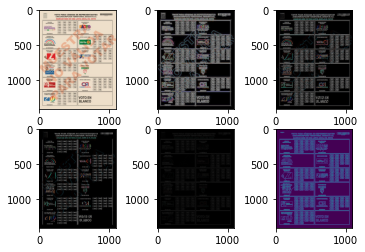

In [10]:
plt.subplot(2,3,1),plt.imshow(image)
plt.subplot(2,3,2),plt.imshow(image1)
plt.subplot(2,3,3),plt.imshow(image2)
plt.subplot(2,3,4),plt.imshow(sobelx)
plt.subplot(2,3,5),plt.imshow(laplace)
plt.subplot(2,3,6),plt.imshow(canny)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Comparacion de Tiempos de ejecucion.

In [11]:
print('El tiempo del filtro prewitt es ', (final-inicio))
print('El tiempo del filtro canny es ', (final1-inicio1))
print('El tiempo del filtro sobel es ', (final2-inicio2))
print('El tiempo del filtro laplaciano es ', (final3-inicio3))



El tiempo del filtro prewitt es  0.15998506546020508
El tiempo del filtro canny es  0.03699994087219238
El tiempo del filtro sobel es  0.011000633239746094
El tiempo del filtro laplaciano es  0.012996196746826172


# Conclusiones generales.

- Para nuestra aplicacion de detección de bordes el mejor filtro es el canny
- En tiempo de ejecucion es claramente mejor el filtro sobel sin embargo la imagen posee mucho ruido y los contornos no son tan notables, así mismo se puede revisar otros ordenes de derivadas.